# Klasifikace

## Dataset pro tuto metodu dolování dat
Pro dva druhy (Cammeo a Osmancik) bylo pořízeno celkem 3810 snímků rýžových zrn, které byly zpracovány a byly provedeny závěry o vlastnostech. Pro každé zrnko rýže bylo získáno 7 morfologických znaků.

https://www.kaggle.com/datasets/muratkokludataset/rice-dataset-commeo-and-osmancik?resource=download


## Nejdřív se načte dataset a prozkoumá se

In [210]:
import os
import pandas as pd

data_folder = os.path.join("datasets")
filename = os.path.join(data_folder, "Rice_Cammeo_Osmancik.xlsx")
df = pd.read_excel(filename)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [212]:
df.nunique().sort_values()

Class                   2
Area                 2828
Convex_Area          2857
Perimeter            3738
Eccentricity         3803
Minor_Axis_Length    3804
Extent               3804
Major_Axis_Length    3808
dtype: int64

In [213]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [214]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'Major_Axis_Length'}>],
       [<AxesSubplot:title={'center':'Minor_Axis_Length'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'Convex_Area'}>],
       [<AxesSubplot:title={'center':'Extent'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

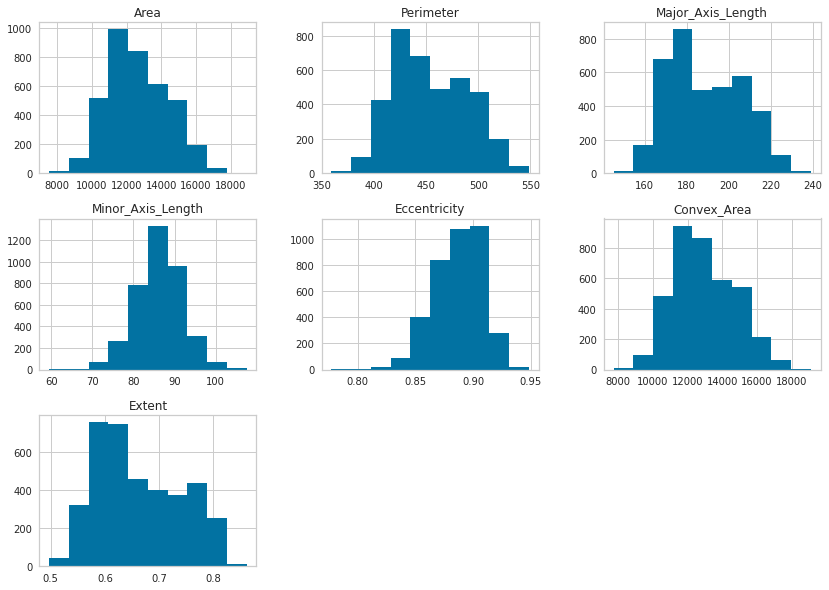

In [215]:
df[df.columns[:-1]].hist(figsize=(14,10))

## Použití knihovny scikit-learn

In [216]:
X = df[df.columns[:-1]]
y = df['Class']

Data rozdelime na trenovaci a testovaci mnozinu


In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=14)

## Rozhodovací stromy

In [218]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
#trenovani
dt_clf = dt_clf.fit(X_train,y_train)

In [219]:
#testovani
y_predicted_dt = dt_clf.predict(X_test)

[Text(200.14152395404292, 293.0004, 'X[2] <= 190.847\ngini = 0.489\nsamples = 2857\nvalue = [1217, 1640]'),
 Text(85.49629308476045, 281.0412, 'X[2] <= 181.237\ngini = 0.101\nsamples = 1610\nvalue = [86, 1524]'),
 Text(39.09507912421417, 269.082, 'X[6] <= 0.824\ngini = 0.023\nsamples = 1192\nvalue = [14, 1178]'),
 Text(27.095599393019725, 257.1228, 'X[2] <= 176.597\ngini = 0.022\nsamples = 1190\nvalue = [13, 1177]'),
 Text(12.386559722523304, 245.16360000000003, 'X[1] <= 443.044\ngini = 0.007\nsamples = 878\nvalue = [3, 875]'),
 Text(6.193279861261652, 233.20440000000002, 'X[4] <= 0.88\ngini = 0.005\nsamples = 869\nvalue = [2, 867]'),
 Text(3.096639930630826, 221.2452, 'gini = 0.0\nsamples = 677\nvalue = [0, 677]'),
 Text(9.289919791892478, 221.2452, 'X[4] <= 0.88\ngini = 0.021\nsamples = 192\nvalue = [2, 190]'),
 Text(6.193279861261652, 209.286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(12.386559722523304, 209.286, 'X[3] <= 81.777\ngini = 0.01\nsamples = 191\nvalue = [1, 190]'

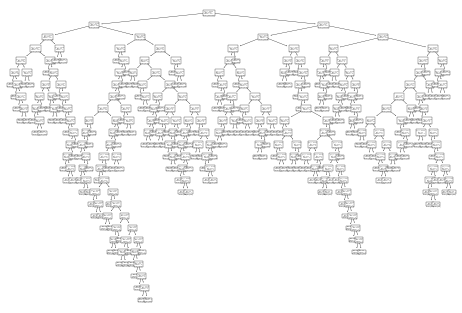

In [220]:
from sklearn import tree

tree.plot_tree(dt_clf)

In [221]:
from sklearn import metrics

dt_accuracy = metrics.accuracy_score(y_test,y_predicted_dt)
dt_matrix = metrics.confusion_matrix(y_test, y_predicted_dt)

## Náhodné lesy

In [222]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [223]:
#testovani
y_predicted_rf = rf_clf.predict(X_test)

rf_accuracy = metrics.accuracy_score(y_test, y_predicted_rf)
rf_matrix = metrics.confusion_matrix(y_test, y_predicted_rf)

## Bayesovská klasifikace

In [224]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [225]:
y_predicted_nb = nb_clf.predict(X_test)

nb_accuracy = metrics.accuracy_score(y_test, y_predicted_nb)
nb_matrix = metrics.confusion_matrix(y_test, y_predicted_nb)

## Neuronové sítě

Data pro neuronovou sit by byla vhodna normalizovat

In [226]:
from sklearn.preprocessing import normalize

X_normalized = normalize(X, norm='max')

X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, random_state=14)

In [227]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=14)
mlp_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=14, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [228]:
y_predicted_mlp = mlp_clf.predict(X_test)

mlp_accuracy = metrics.accuracy_score(y_test, y_predicted_mlp)
mlp_matrix = metrics.confusion_matrix(y_test, y_predicted_mlp)

## K – nejbližších sousedů

In [229]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [230]:
y_predicted_knn = knn_clf.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, y_predicted_knn)
knn_matrix = metrics.confusion_matrix(y_test, y_predicted_knn)

## Porovnání modelu

In [231]:
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network', 'K-Nearest Neighbors'],
    'Score' : [dt_accuracy*100,rf_accuracy*100,nb_accuracy*100,mlp_accuracy*100,knn_accuracy*100]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,K-Nearest Neighbors,92.339979
1,Random Forest,92.130115
2,Naive Bayes,91.605456
0,Decision Tree,88.772298
3,Neural Network,56.663169


<AxesSubplot:title={'center':'K-Nearest Neighbors'}>

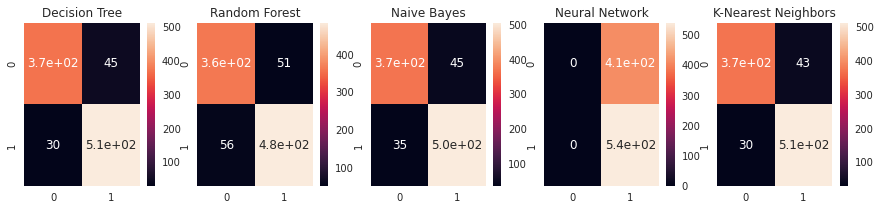

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,3))
plt.subplot(1,5,1).set_title('Decision Tree')
sns.heatmap(pd.DataFrame(rf_matrix), annot=True)
plt.subplot(1,5,2).set_title('Random Forest')
sns.heatmap(pd.DataFrame(dt_matrix), annot=True)
plt.subplot(1,5,3).set_title('Naive Bayes')
sns.heatmap(pd.DataFrame(nb_matrix), annot=True)
plt.subplot(1,5,4).set_title('Neural Network')
sns.heatmap(pd.DataFrame(mlp_matrix), annot=True)
plt.subplot(1,5,5).set_title('K-Nearest Neighbors')
sns.heatmap(pd.DataFrame(knn_matrix), annot=True)

## Použití knihovny mlxtend

In [233]:
from mlxtend.preprocessing import minmax_scaling

In [238]:

#predzpracovani dat pro mlxtend a rozdeleni do trenovaci a testovaci mnoziny
df_mlxtend = df.copy()
class_map = {"Cammeo": 0, "Osmancik": 1}

df_mlxtend = df_mlxtend.applymap(lambda s: class_map.get(s) if s in class_map else s)

X_m = df_mlxtend[df_mlxtend.columns[:-1]]
y_m = df_mlxtend['Class']

X_mlxtend=minmax_scaling(X_m, columns=['Area',	'Perimeter',	'Major_Axis_Length',	'Minor_Axis_Length',	'Eccentricity',	'Convex_Area',	'Extent'])

X_trainM, X_testM, y_trainM, y_testM = train_test_split(X_mlxtend,y_m, random_state=14)
#funkce mlxtendu neprijmaji pd.Dataframe, ale np.array
X_trainM = X_trainM.values
X_testM = X_testM.values

y_trainM = y_trainM.values
y_testM = y_testM.values

## Neuronové sítě

In [239]:
from mlxtend.classifier import Perceptron
#vytvoreni modelu a trenovani
ppn = Perceptron()
ppn.fit(X_trainM, y_trainM)

In [240]:
#testovani
y_predicted_ppn = ppn.predict(X_testM)

In [241]:
from mlxtend.evaluate import accuracy_score

accuracy_score(y_testM, y_predicted_ppn)

0.6935991605456453

In [242]:
from mlxtend.evaluate import confusion_matrix

cm = confusion_matrix(y_testM, y_predicted_ppn)

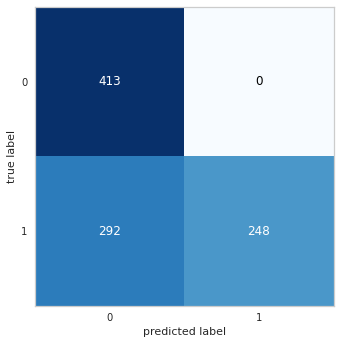

In [244]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()


In [245]:
from mlxtend.classifier import MultiLayerPerceptron as MLP

nn1 = MLP(hidden_layers=[100])

nn1 = nn1.fit(X_trainM, y_trainM)

In [246]:
y_predicted_nn1 = nn1.predict(X_testM)

In [247]:
accuracy_score(y_testM, y_predicted_nn1)

0.5666316894018888

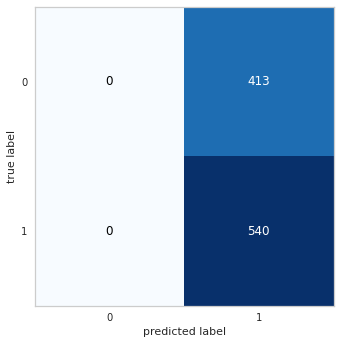

In [248]:
cm2 = confusion_matrix(y_testM, y_predicted_nn1)
fig, ax = plot_confusion_matrix(conf_mat=cm2)
plt.show()

In [249]:
from mlxtend.classifier import Adaline

ada = Adaline()
ada.fit(X_trainM, y_trainM)

In [250]:
y_predicted_ada=ada.predict(X_testM)

In [251]:
accuracy_score(y_testM, y_predicted_ada)

0.9286463798530955

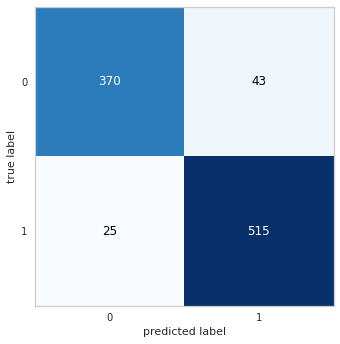

In [253]:
cm3 = confusion_matrix(y_testM, y_predicted_ada)
fig, ax = plot_confusion_matrix(conf_mat=cm3)
plt.show()

## Použití knihovny PyCaret

In [254]:
from pycaret.classification import *

In [255]:
#predzpracovani dat, rozdeleni na testovaci a trenovaci mnozinu, nastaveni atributu podle, ktereho se bude klasifikova a interaktivni mo vypnuty
exp = setup(data=df, target='Class', silent=True)

,Description,Value
0,session_id,6581
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"Cammeo: 0, Osmancik: 1"
4,Original Data,"(3810, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## Rozhodovací stromy

In [256]:
#vytvoreni, trenovani a testovani modelu
dt = create_model('dt', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8934,0.888,0.9227,0.8956,0.909,0.7803,0.7808


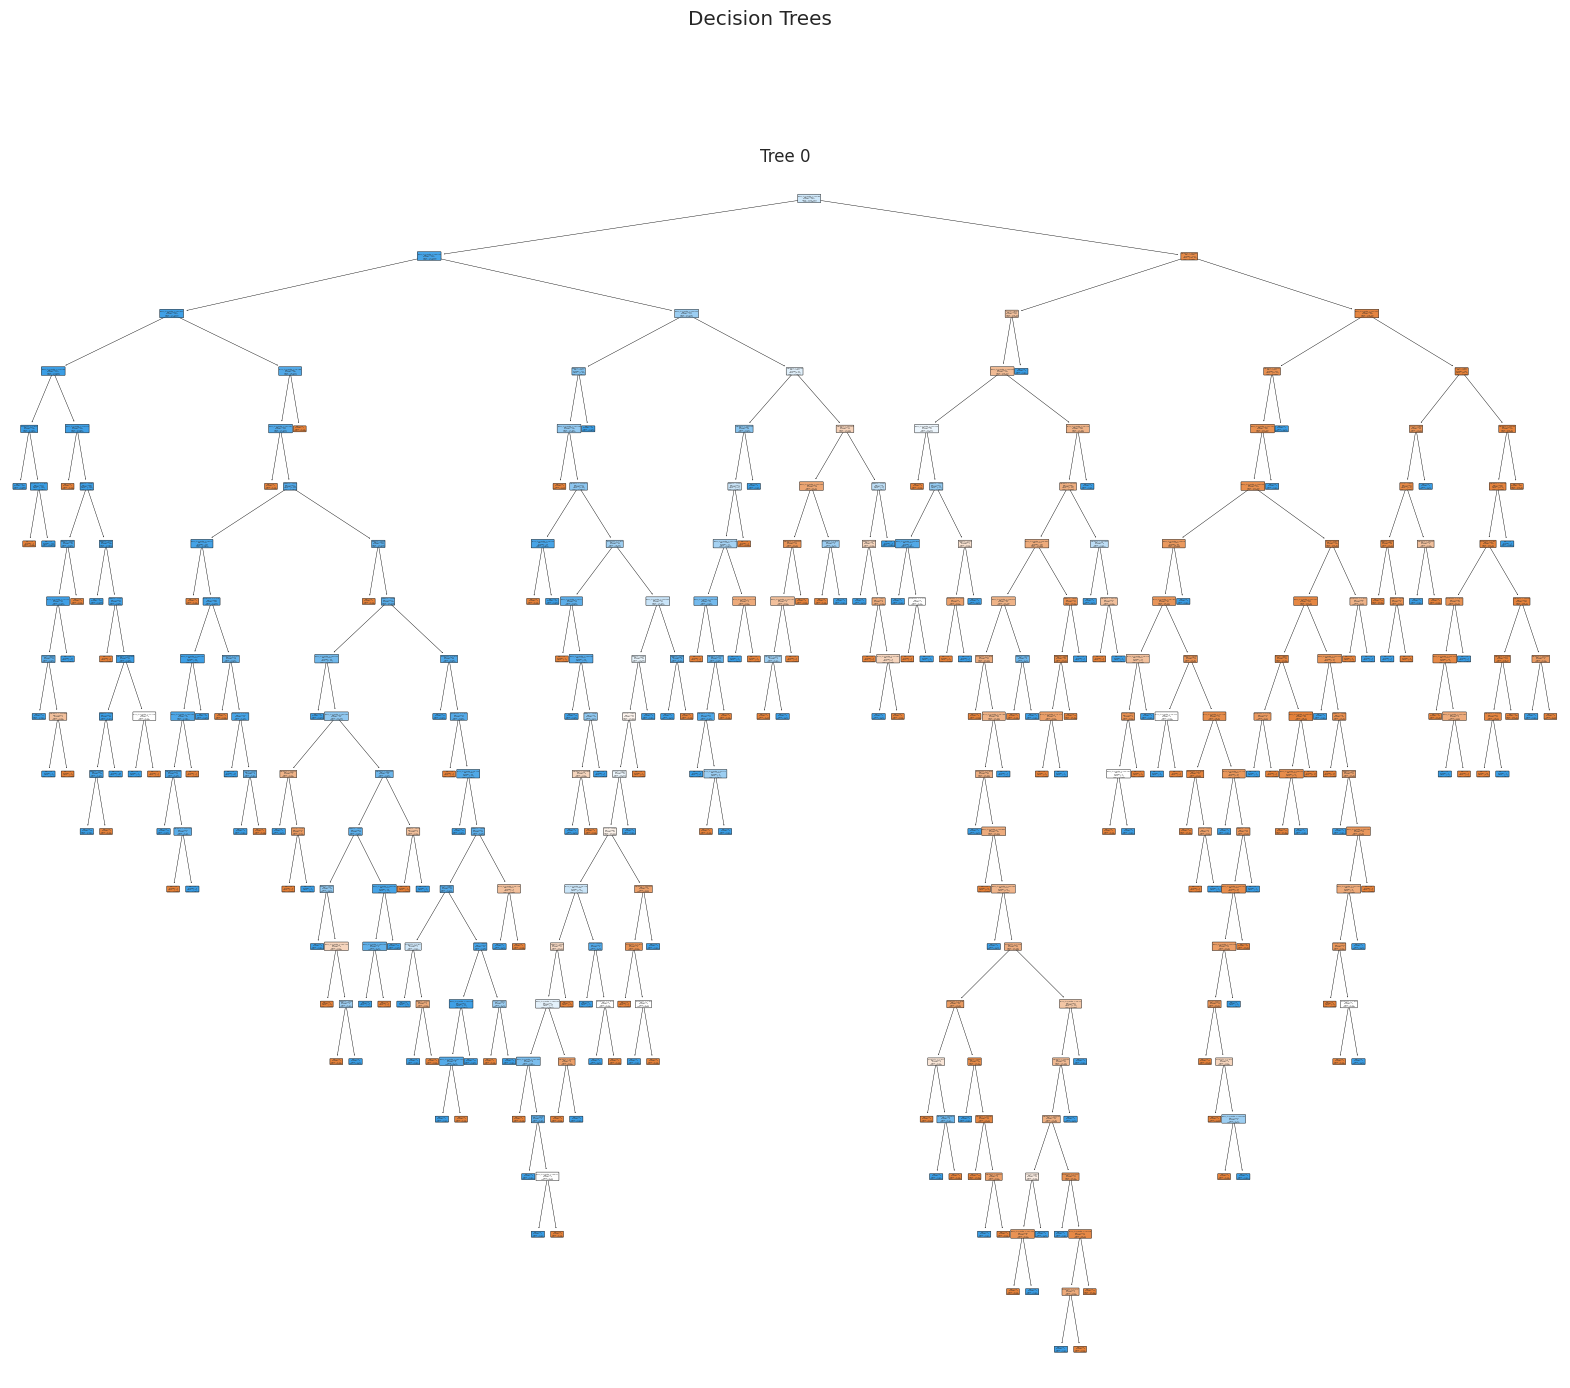

In [257]:
#vykresleni rozhodovaciho stromu
plot_model(dt, plot = 'tree')

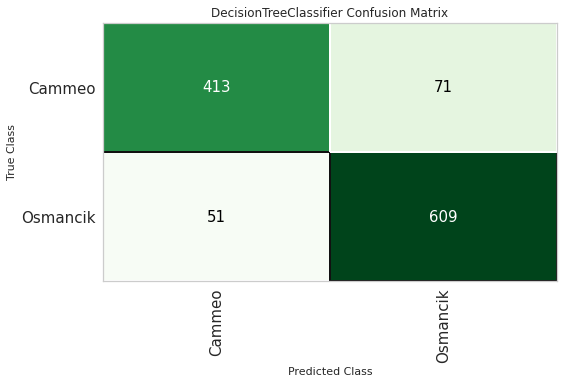

In [258]:
plot_model(dt, plot = 'confusion_matrix')

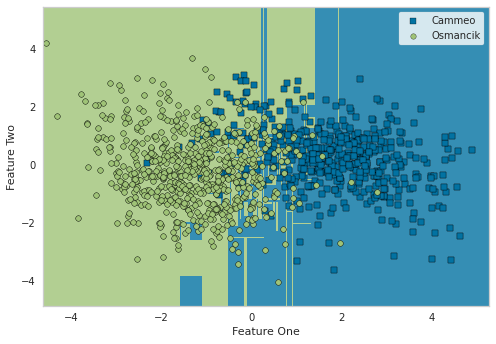

In [259]:
plot_model(dt, plot = 'boundary')

## Náhodné lesy

In [260]:
#vytvoreni, trenovani a testovani modelu
rf = create_model('rf', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9187,0.9699,0.9545,0.9091,0.9313,0.8319,0.8334


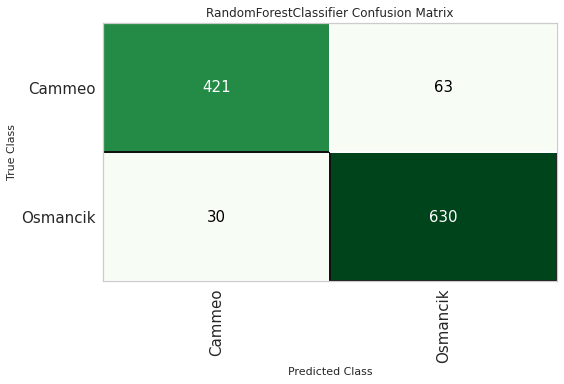

In [261]:
plot_model(rf, plot = 'confusion_matrix')

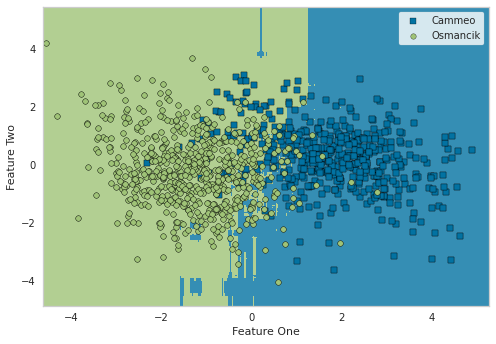

In [262]:
plot_model(rf, plot = 'boundary')

## Bayesovská klasifikace

In [263]:
#vytvoreni, trenovani a testovani modelu
nb = create_model('nb', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9073,0.9641,0.9455,0.8991,0.9217,0.8084,0.8099


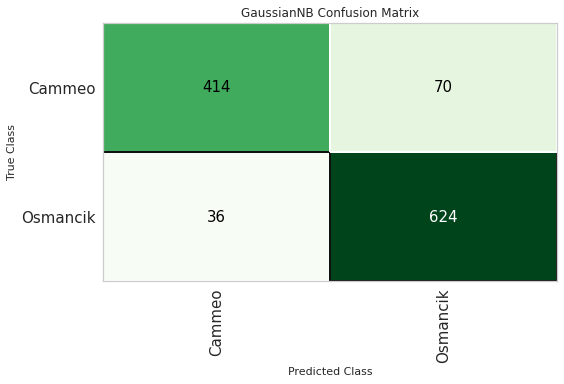

In [264]:
plot_model(nb, plot='confusion_matrix')

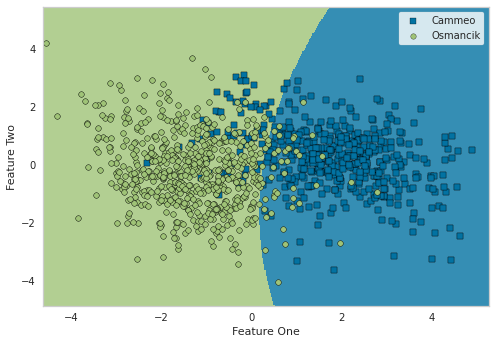

In [265]:
plot_model(nb, plot='boundary')

## Neuronové sítě

In [266]:
#vytvoreni, trenovani a testovani modelu
mlp = create_model('mlp', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6652,0.7114,0.7015,0.7134,0.7074,0.3163,0.3163


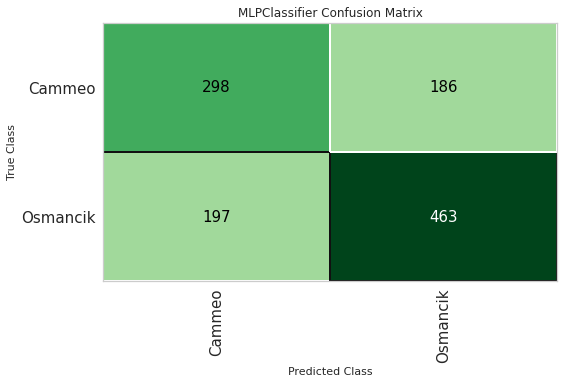

In [267]:
plot_model(mlp, plot='confusion_matrix')

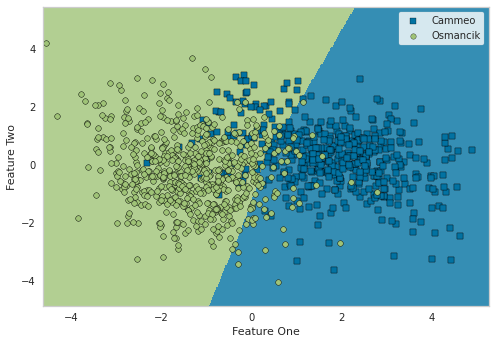

In [268]:
plot_model(mlp, plot='boundary')

## K – nejbližších sousedů

In [269]:
#vytvoreni, trenovani a testovani modelu
knn = create_model('knn', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8881,0.9403,0.9333,0.88,0.9059,0.7682,0.7703


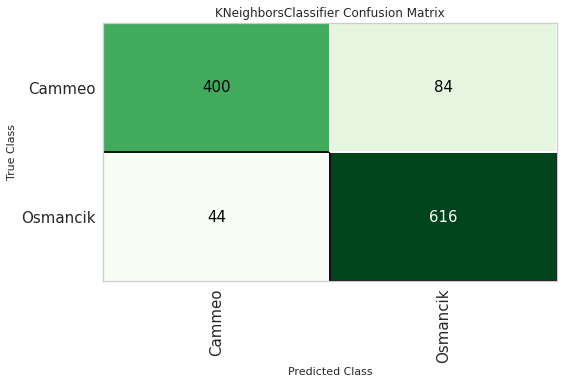

In [270]:
plot_model(knn, plot='confusion_matrix')

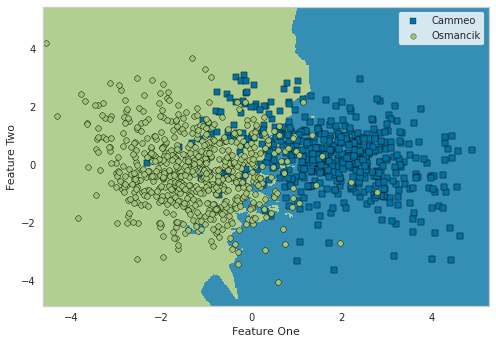

In [271]:
plot_model(knn, plot='boundary')